In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
data["Gender"] = data["Gender"].map({"Male":1,"Female":0})
data = data.drop(columns="CustomerID")

In [22]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [23]:
class KMeansClustering():
    def __init__(self, num_clusters = 2, max_iter = 100):
        self.num_clusters = num_clusters
        self.max_iter = max_iter
        self.centroid = None

    def fit_predict(self, X):
        random_index = np.random.choice(X.shape[0],self.num_clusters, replace = False)
        self.centroid = X[random_index]
        
        for i in range(self.max_iter):
            cluster_group = self.assign_cluster(X)
            old_centroid = self.centroid
            self.centroid = self.move_centroid(X, cluster_group)
            if np.all(old_centroid == self.centroid):
                break
        
        return cluster_group
    
    def assign_cluster(self, X):
        cluster_group = []

        for row in X:
            distances = []
            for centroid in self.centroid:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
        return np.array(cluster_group)
    

    def move_centroid(self, X, cluster_group):
        new_centroid = []
        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroid.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroid)
    
    def calculate_wcss(self, X, cluster_group):
        wcss = 0
        for i in np.unique(cluster_group):
            cluster_points = X[cluster_group == i]
            centroid = self.centroid[i]
            wcss += np.sum((cluster_points - centroid) ** 2)
        return wcss


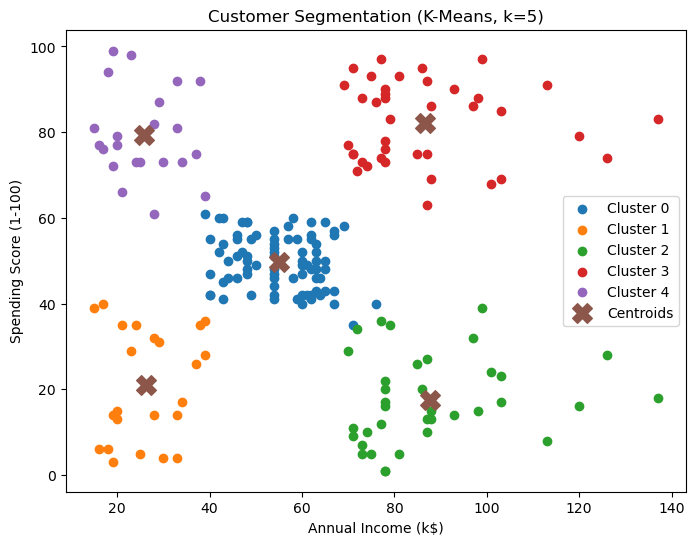

In [24]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

kmeans = KMeansClustering(num_clusters=5)
labels = kmeans.fit_predict(X)
k=5
plt.figure(figsize=(8, 6))

for i in np.unique(labels):
    plt.scatter(
        X[labels == i, 0],
        X[labels == i, 1],
        label=f"Cluster {i}"
    )

plt.scatter(
    kmeans.centroid[:, 0],
    kmeans.centroid[:, 1],
    marker='X',
    s=200,
    label='Centroids'
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title(f"Customer Segmentation (K-Means, k={k})")
plt.legend()
plt.show()


In [25]:
wcss_list = []
K = range(1, 11)

for k in K:
    kmeans = KMeansClustering(num_clusters=k)
    labels = kmeans.fit_predict(X)
    wcss = kmeans.calculate_wcss(X, labels)
    wcss_list.append(wcss)

In [26]:
wcss_list[4]

44448.45544793371

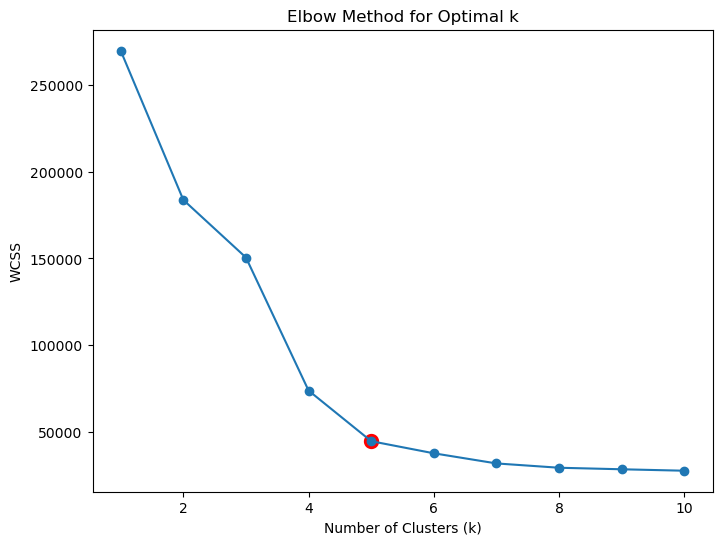

In [27]:
plt.figure(figsize=(8, 6))

plt.plot(K, wcss_list, marker='o')
plt.scatter(5,wcss_list[4], c='r', linewidths=5)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()